<a href="https://colab.research.google.com/github/zia207/Survival_Analysis_R/blob/main/Colab_Notebook/02_07_03_04_survival_analysis_log_logistic_model_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![All-test](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 3.4 Log-Logistic Survival Model


The log-logistic model is a parametric survival model where the logarithm of survival time follows a logistic distribution. It is particularly useful for modeling survival data with non-monotonic hazard functions, making it suitable for various applications in medical research, reliability engineering, and economics.


## Overview


The **Log-Logistic survival model** is a parametric model in survival analysis where the logarithm of the survival time $T$, denoted $\ln(T)$, follows a logistic distribution. It is an Accelerated Failure Time (AFT) model, meaning covariates scale the survival time multiplicatively, accelerating or decelerating the time to an event (e.g., death, failure). The log-logistic model is particularly useful for modeling survival data with a non-monotonic hazard function that increases to a peak and then decreases, similar to the log-normal model, but it often has more tractable mathematical forms, including closed-form expressions for the survival and hazard functions.


#### Key Features


- **Hazard Function**: The hazard is typically non-monotonic, rising to a peak and then declining (arc-shaped) for shape parameter $p > 1$, or monotonically decreasing for $p \leq 1$. This makes it suitable for scenarios like post-treatment recovery, where risk initially increases (e.g., due to complications) and later decreases (e.g., as patients stabilize).
- **Applications**: Used in medical research (e.g., time to cancer relapse), reliability engineering (e.g., component lifetimes), and economics (e.g., duration of unemployment) when hazards are non-monotonic or decreasing.
- **Assumptions**: Assumes $\ln(T)$) follows a logistic distribution, implying  $T$ is log-logistically distributed. This is appropriate when empirical hazard plots (e.g., from Kaplan-Meier) show an arc-shaped or decreasing pattern.
- **Advantages**: Unlike the log-normal model, the log-logistic model has closed-form survival and hazard functions, making it easier to compute probabilities and hazard ratios. It can also fit into a proportional odds framework.
- **Limitations**: Not ideal for monotonically increasing hazards (use Weibull instead). May not capture complex hazard shapes as well as flexible models like generalized gamma.


- **Probability Density Function (PDF)**:

$$
  f(t) = \frac{p \lambda^p t^{p-1}}{(1 + (\lambda t)^p)^2}, \quad t > 0, \quad \lambda, p > 0
$$

 where $\lambda$ is the scale parameter, and $p$ is the shape parameter. The PDF describes the distribution of survival times, which is right-skewed.

- **Survival Function**:

$$
S(t) = \frac{1}{1 + (\lambda t)^p}
$$

  This gives the probability of surviving past time $t$. It decreases from $S(0) = 1$ to $S(\infty) = 0$.

- **Hazard Function**:

$$
  h(t) = \frac{f(t)}{S(t)} = \frac{p \lambda^p t^{p-1}}{1 + (\lambda t)^p}
$$
- For $p > 1$, the hazard increases to a peak at $t = \left( \frac{p-1}{\lambda^p p} \right)^{1/p}$ and then decreases.

  - For $p \leq 1$, the hazard is monotonically decreasing.
  
- **Mean and Variance** (for $p > 1$):

  - Mean: $E[T] = \frac{\pi / (p \lambda)}{\sin(\pi / p)}$
  
  - Variance: $\text{Var}(T) = \frac{2\pi / (p \lambda^2)}{\sin(2\pi / p)} - \left( \frac{\pi / (p \lambda)}{\sin(\pi / p)} \right)^2$
  
  - Note: The mean is undefined for $p \leq 1$.


### When to Use


Choose the log-logistic model when:

- Nonparametric hazard estimates (e.g., from Kaplan-Meier or kernel smoothing) show an arc-shaped or decreasing hazard.
- Survival times are positively skewed, and a logistic distribution for $\ln(T)$ is plausible.
- You need closed-form expressions for survival or hazard functions, unlike the log-normal model.
- You prefer an AFT model or a proportional odds framework to interpret covariate effects.


### Model Fit Assessment


- Use AIC/BIC to compare with other models (e.g., Weibull, log-normal).
- Check residuals (e.g., Cox-Snell) or compare fitted survival curves to Kaplan-Meier estimates.
- Validate the log-logistic assumption with Q-Q plots of log-times against a logistic distribution or hazard shape diagnostics.


## Setup R in Python Runtype - Install {rpy2}
{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp312-cp312-linux_x86_64.whl size=316561 sha256=2d206a902c40d1b7715ce981767d105bfb8161e27bc51744938fe97bbbfe11f6
  Stored in directory: /root/.cache/pip/wheels/00/26/d5/d5e8c0b039915e785be870270e4a9263e5058168a03513d8cc
Successfully built rpy2


## Mount Google Drive

In [ ]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Implementation in R


This tutorial demonstrates fitting a log-logistic survival model using R’s `survival` package, with diagnostics to assess model fit. We’ll use the `lung` dataset from `survival`, which contains survival times for lung cancer patients. The code includes data preparation, model fitting, predictions, plotting, and diagnostics, incorporating lessons from your previous queries (e.g., handling `status`, centering covariates, robust plotting, and addressing errors like `Invalid status value`, `psurvreg`, and plotting issues).


### Install Required R Packages


Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:


In [ ]:
%%R
packages <-c(
		 'tidyverse',
		 'survival',
		 'flexsurv',
		 'survminer',
		 'ggsurvfit',
		 'tidycmprsk',
		 'ggfortify',
		 'timereg',
		 'cmprsk',
		 'condSURV',
		 'riskRegression'
		 )


### Install missing packages

In [ ]:
%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')
devtools::install_github("ItziarI/WeDiBaDis", lib='drive/My Drive/R/')

### Verify installation

In [ ]:
%%R
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:


  method        from 
  nobs.multinom broom



     tidyverse       survival       flexsurv      survminer      ggsurvfit 
          TRUE           TRUE           TRUE           TRUE           TRUE 
    tidycmprsk      ggfortify        timereg         cmprsk       condSURV 
          TRUE           TRUE           TRUE           TRUE           TRUE 
riskRegression 
          TRUE 


### Load Packages

In [ ]:
%%R
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
     tidyverse       survival       flexsurv      survminer      ggsurvfit 
          TRUE           TRUE           TRUE           TRUE           TRUE 
    tidycmprsk      ggfortify        timereg         cmprsk       condSURV 
          TRUE           TRUE           TRUE           TRUE           TRUE 
riskRegression 
          TRUE 


In [ ]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])

Successfully loaded packages:
[1] "package:tools"     "package:stats"     "package:graphics" 
[4] "package:grDevices" "package:utils"     "package:datasets" 
[7] "package:methods"   "package:base"     


### Data Preparation

In [ ]:
%%R
library(survival)
# Load and prepare lung dataset
data(lung)
# Recode status: 1=censored (0), 2=dead (1)
lung$status <- lung$status - 1

# Data cleaning
lung_clean <- lung[!is.na(lung$time) & !is.na(lung$status) &
                   !is.na(lung$age) & !is.na(lung$sex) &
                   lung$time > 0 & lung$status %in% c(0, 1), ]
# Verify data
print("Status values after recoding:")
table(lung_clean$status, useNA = "always")
print("Any non-positive times?")
any(lung_clean$time <= 0)
print("Summary of cleaned data:")
summary(lung_clean[, c("time", "status", "age", "sex")])

[1] "Status values after recoding:"
[1] "Any non-positive times?"
[1] "Summary of cleaned data:"
      time            status            age             sex       
 Min.   :   5.0   Min.   :0.0000   Min.   :39.00   Min.   :1.000  
 1st Qu.: 166.8   1st Qu.:0.0000   1st Qu.:56.00   1st Qu.:1.000  
 Median : 255.5   Median :1.0000   Median :63.00   Median :1.000  
 Mean   : 305.2   Mean   :0.7237   Mean   :62.45   Mean   :1.395  
 3rd Qu.: 396.5   3rd Qu.:1.0000   3rd Qu.:69.00   3rd Qu.:2.000  
 Max.   :1022.0   Max.   :1.0000   Max.   :82.00   Max.   :2.000  


### Model Fitting

In [ ]:
%%R
# Center age to improve numerical stability
lung_clean$age_centered <- lung_clean$age - mean(lung_clean$age)

# Create survival object
surv_object <- Surv(time = lung_clean$time, event = lung_clean$status)

# Fit log-logistic models
llogis_model <- survreg(surv_object ~ 1, data = lung_clean, dist = "loglogistic")
llogis_model_cov <- tryCatch(
  survreg(surv_object ~ age_centered + sex, data = lung_clean, dist = "loglogistic"),
  error = function(e) {
    message("Convergence failed, trying with initial estimates")
    survreg(surv_object ~ age_centered + sex, data = lung_clean, dist = "loglogistic",
            init = c(5, 0, 0))  # Initial values: intercept, age_centered, sex
  }
)
print("Model summary (with covariates):")
summary(llogis_model_cov)

[1] "Model summary (with covariates):"

Call:
survreg(formula = surv_object ~ age_centered + sex, data = lung_clean, 
    dist = "loglogistic")
                Value Std. Error     z       p
(Intercept)   5.04773    0.20381 24.77 < 2e-16
age_centered -0.01401    0.00771 -1.82 0.06946
sex           0.47751    0.14036  3.40 0.00067
Log(scale)   -0.56991    0.06543 -8.71 < 2e-16

Scale= 0.566 

Log logistic distribution
Loglik(model)= -1152.9   Loglik(intercept only)= -1160.9
	Chisq= 16.07 on 2 degrees of freedom, p= 0.00032 
Number of Newton-Raphson Iterations: 4 
n= 228 



### Predictions

In [ ]:
%%R
# Prediction for new data (60-year-old male)
new_data <- data.frame(age_centered = 60 - mean(lung_clean$age), sex = 1)
median_time <- predict(llogis_model_cov, newdata = new_data, type = "response")
print("Median survival time (days):")
print(median_time)

[1] "Median survival time (days):"
      1 
259.698 


### Survival Probability at t=500 days

In [ ]:
%%R
# Survival probability at t=500 days
# Log-logistic survival: S(t) = 1 / (1 + (lambda * t)^p), where lambda = exp(-mu), p = 1/scale
mu <- predict(llogis_model_cov, newdata = new_data, type = "lp")
p <- 1 / llogis_model_cov$scale
lambda <- exp(-mu)
surv_prob <- 1 / (1 + (lambda * 500)^p)
print("Survival probability at t=500 days:")
print(surv_prob)

[1] "Survival probability at t=500 days:"
        1 
0.2389831 


#### Plotting

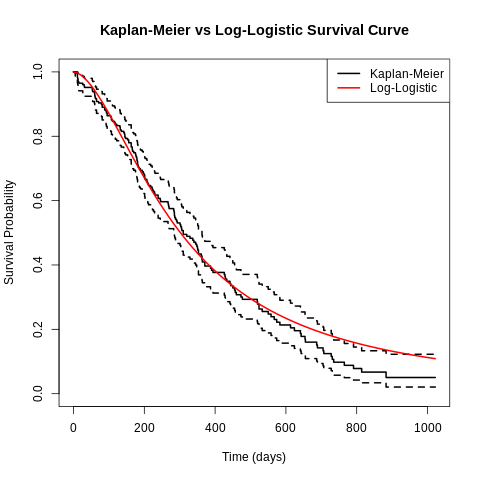

In [ ]:
%%R
# Plot Kaplan-Meier and log-logistic curve (null model)
km_fit <- survfit(surv_object ~ 1)
plot(km_fit, main = "Kaplan-Meier vs Log-Logistic Survival Curve",
     xlab = "Time (days)", ylab = "Survival Probability",
     col = "black", lwd = 2)
t_seq <- seq(0, max(lung_clean$time), length.out = 100)
mu_null <- coef(llogis_model)[1]
p_null <- 1 / llogis_model$scale
lambda_null <- exp(-mu_null)
surv_llogis <- 1 / (1 + (lambda_null * t_seq)^p_null)
lines(t_seq, surv_llogis, col = "red", lwd = 2)
legend("topright", c("Kaplan-Meier", "Log-Logistic"), col = c("black", "red"), lwd = 2)

### Model Diagnostics

#### Q-Q Plot

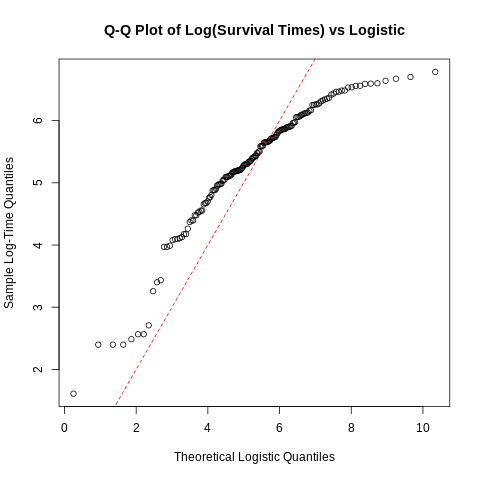

In [ ]:
%%R

# 1. Q-Q Plot for Log-Logistic Assumption
# Log(times) should follow a logistic distribution for events
log_times <- log(lung_clean$time[lung_clean$status == 1])
# Empirical quantiles vs logistic quantiles
n <- length(log_times)
probs <- (1:n) / (n + 1)
q_logistic <- qlogis(probs, location = mean(log_times), scale = sd(log_times))
plot(sort(q_logistic), sort(log_times),
     main = "Q-Q Plot of Log(Survival Times) vs Logistic",
     xlab = "Theoretical Logistic Quantiles", ylab = "Sample Log-Time Quantiles")
abline(0, 1, col = "red", lty = 2)

#### Cox-Snell Residuals a

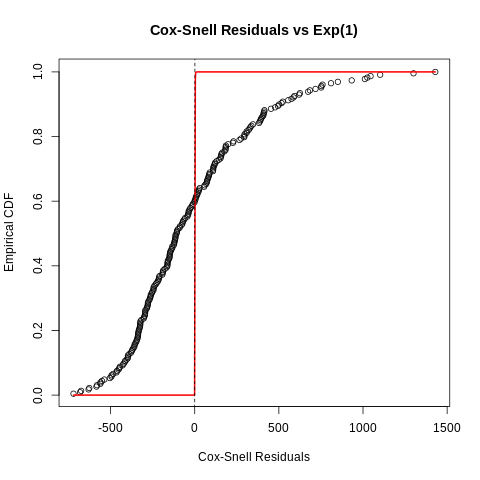

In [ ]:
%%R
# 2. Cox-Snell Residuals
residuals_cs <- (lung_clean$time - predict(llogis_model_cov, type = "response")) / llogis_model_cov$scale
plot(sort(residuals_cs), (1:length(residuals_cs))/length(residuals_cs),
     main = "Cox-Snell Residuals vs Exp(1)",
     xlab = "Cox-Snell Residuals", ylab = "Empirical CDF")
lines(sort(residuals_cs), pexp(sort(residuals_cs), rate = 1), col = "red", lwd = 2)
abline(0, 1, lty = 2)

#### Goodness-of-Fit and Hazard Plot

[1] "AIC Comparison:"
                  df      AIC
llogis_model_cov   4 2313.794
weibull_model_cov  4 2302.109
lnorm_model_cov    4 2325.500


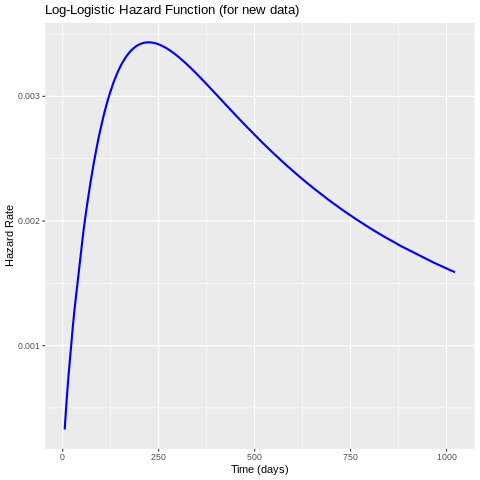

In [ ]:
%%R
library(flexsurv) # Load flexsurv for flexsurvreg function
library(ggplot2) # Load ggplot2 for ggplot function

# 3. Goodness-of-Fit: Compare with Weibull and Log-Normal
weibull_model_cov <- survreg(surv_object ~ age_centered + sex, data = lung_clean, dist = "weibull")
lnorm_model_cov <- survreg(surv_object ~ age_centered + sex, data = lung_clean, dist = "lognormal")
print("AIC Comparison:")
print(AIC(llogis_model_cov, weibull_model_cov, lnorm_model_cov))

# 4. Hazard Plot (using flexsurv)
flex_llogis <- flexsurvreg(surv_object ~ age_centered + sex, data = lung_clean, dist = "llogis")
haz_llogis <- summary(flex_llogis, newdata = new_data, type = "hazard", tidy = TRUE)
ggplot(haz_llogis, aes(x = time, y = est)) +
  geom_line(col = "blue", lwd = 1) +
  ggtitle("Log-Logistic Hazard Function (for new data)") +
  xlab("Time (days)") + ylab("Hazard Rate")

## Summary and Conclusion


This notebook demonstrated fitting a log-logistic survival model using R, covering data preparation, model fitting, predictions, plotting, and diagnostics. The log-logistic model is suitable for survival data with non-monotonic or decreasing hazards and provides closed-form expressions for survival and hazard functions. Model diagnostics, including Q-Q plots and Cox-Snell residuals, help assess the fit and validate assumptions. Comparing AIC values with Weibull and log-normal models aids in selecting the best-fitting model.


## Resources


- **R Documentation**:
  - `survreg`: [https://rdrr.io/r/stats/survreg.html](https://rdrr.io/r/stats/survreg.html)
  - `flexsurvreg`: [https://cran.r-project.org/web/packages/flexsurv/flexsurv.pdf](https://cran.r-project.org/web/packages/flexsurv/flexsurv.pdf)
- **Books**:
  - "Survival Analysis: Techniques for Censored and Truncated Data" by Klein & Moeschberger
  - "Applied Survival Analysis" by Hosmer, Lemeshow, & May
- **Tutorials**:
  - UCLA IDRE Survival Analysis with R: [https://stats.idre.ucla.edu/r/seminars/survival-analysis-with-r/](https://stats.idre.ucla.edu/r/seminars/survival-analysis-with-r/)
  - R-bloggers: [https://www.r-bloggers.com/](https://www.r-bloggers.com/)
- **Online Courses**:
  - Coursera: "Survival Analysis in R" by Duke University
  - edX: "Survival Analysis" by Harvard University


In [ ]:
%%R
rm(list = ls())